# Лабораторная табота №1 - Попова Анастасия

**с помощью `Pandas` и `Scikit-learn`,**
**а также `numpy` и `matplotlib`**

- `numpy` – матричные операции
- `matplotlib` – научная графика
- `pandas` – таблицы (DataFrame) для анализа данных
- `scikit-learn` – алгоритмы машинного обучения



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

Описание признаков:

    1.  region-centroid-col:  the column of the center pixel of the region.
    2.  region-centroid-row:  the row of the center pixel of the region.
    3.  region-pixel-count:  the number of pixels in a region = 9.
    4.  short-line-density-5:  the results of a line extractoin algorithm that 
         counts how many lines of length 5 (any orientation) with
         low contrast, less than or equal to 5, go through the region.
    5.  short-line-density-2:  same as short-line-density-5 but counts lines
         of high contrast, greater than 5.
    6.  vedge-mean:  measure the contrast of horizontally
         adjacent pixels in the region.  There are 6, the mean and 
         standard deviation are given.  This attribute is used as
        a vertical edge detector.
    7.  vegde-sd:  (see 6)
    8.  hedge-mean:  measures the contrast of vertically adjacent
          pixels. Used for horizontal line detection. 
    9.  hedge-sd: (see 8).
    10. intensity-mean:  the average over the region of (R + G + B)/3
    11. rawred-mean: the average over the region of the R value.
    12. rawblue-mean: the average over the region of the B value.
    13. rawgreen-mean: the average over the region of the G value.
    14. exred-mean: measure the excess red:  (2R - (G + B))
    15. exblue-mean: measure the excess blue:  (2B - (G + R))
    16. exgreen-mean: measure the excess green:  (2G - (R + B))
    17. value-mean:  3-d nonlinear transformation
         of RGB. (Algorithm can be found in Foley and VanDam, Fundamentals
         of Interactive Computer Graphics)
    18. saturatoin-mean:  (see 17)
    19. hue-mean:  (see 17)

8. Missing Attribute Values: None

9. Class Distribution: 

   Classes:  brickface, sky, foliage, cement, window, path, grass.



In [2]:
#здесь была проблема с чтением, поэтому в файле пришлось подписать LABEL
data = pd.read_csv('segmentation.data', sep = ',', engine = 'python', header=1, skiprows = 1)
data.head(3)

,LABEL,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946


In [3]:
print(data.shape)
print(data.columns)

(210, 20)
Index([u'LABEL', u'REGION-CENTROID-COL', u'REGION-CENTROID-ROW',
       u'REGION-PIXEL-COUNT', u'SHORT-LINE-DENSITY-5', u'SHORT-LINE-DENSITY-2',
       u'VEDGE-MEAN', u'VEDGE-SD', u'HEDGE-MEAN', u'HEDGE-SD',
       u'INTENSITY-MEAN', u'RAWRED-MEAN', u'RAWBLUE-MEAN', u'RAWGREEN-MEAN',
       u'EXRED-MEAN', u'EXBLUE-MEAN', u'EXGREEN-MEAN', u'VALUE-MEAN',
       u'SATURATION-MEAN', u'HUE-MEAN'],
      dtype='object')


In [4]:
data.describe()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
count,210.000000,210.000000,210.0,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,124.647619,122.757143,9.0,0.008466,0.006349,1.925132,5.719529,2.604233,11.638377,37.091005,32.967725,44.011112,34.294180,-12.369841,20.760317,-8.390476,44.888360,0.423230,-1.340397
std,74.104024,58.139686,0.0,0.029549,0.030077,3.158211,43.495942,4.798268,97.390023,38.677168,35.540563,43.804447,37.057003,11.559599,18.761842,11.003746,43.235182,0.227333,1.559405
min,1.000000,11.000000,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-48.222220,-9.666667,-30.555555,0.000000,0.000000,-2.530950
25%,60.500000,81.500000,9.0,0.000000,0.000000,0.666667,0.400921,0.777779,0.410816,6.453704,7.000000,8.277778,3.805555,-18.111110,4.111111,-15.750000,10.527778,0.275722,-2.187112
50%,123.500000,121.500000,9.0,0.000000,0.000000,1.222222,0.828695,1.388889,0.913176,21.314816,18.611112,26.833334,20.000000,-10.333333,19.555556,-9.888889,28.388890,0.365455,-2.044163
75%,189.750000,174.500000,9.0,0.000000,0.000000,1.888890,1.676634,2.597221,1.980485,52.629629,46.750000,64.194447,46.472223,-4.666666,34.333332,-3.722222,64.194447,0.539738,-1.429800
max,252.000000,250.000000,9.0,0.111111,0.222222,25.500000,572.996400,44.722225,1386.329200,143.444440,136.888890,150.888890,142.555560,5.777778,78.777780,21.888890,150.888890,1.000000,2.864931


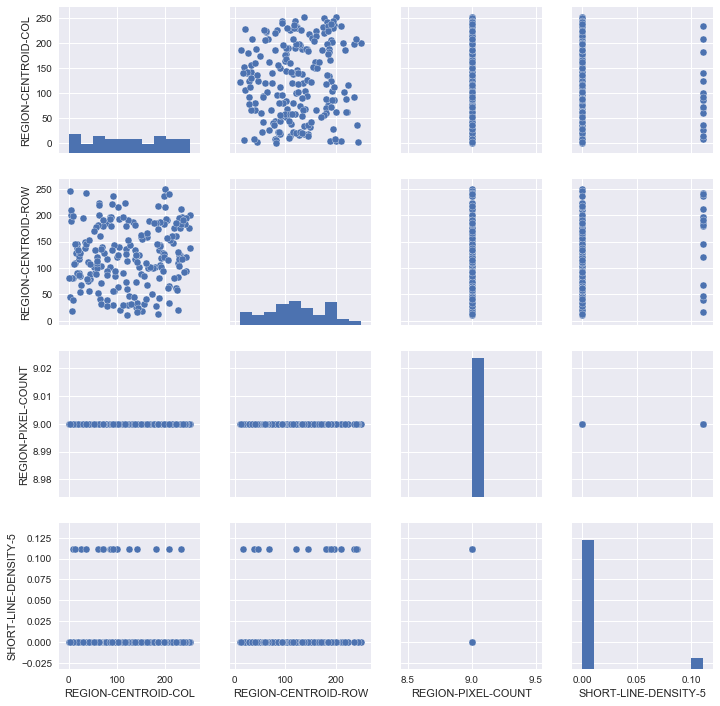

In [5]:
# наглядно на диаграммах рассеяния первых 5 признаков не видно деления на 7 классов
sns.pairplot(data[data.columns[:5]])

In [6]:
data.corr()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
REGION-CENTROID-COL,1.000000,0.081868,NaN,-0.109587,-0.113007,-0.079825,-0.089668,-0.077684,-0.066815,0.012867,0.009511,0.014851,0.013613,-0.041434,0.024445,0.001847,0.016348,-0.118124,0.050728
REGION-CENTROID-ROW,0.081868,1.000000,NaN,0.164906,0.022168,0.012171,-0.054820,0.034361,-0.036091,-0.470674,-0.476086,-0.480821,-0.448783,0.333223,-0.456954,0.429070,-0.460577,0.064391,0.597449
REGION-PIXEL-COUNT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SHORT-LINE-DENSITY-5,-0.109587,0.164906,NaN,1.000000,0.138629,-0.024825,-0.026879,-0.020419,-0.028937,0.004147,0.001105,-0.004500,0.017243,-0.031430,-0.057163,0.130483,0.004905,-0.064482,0.222568
SHORT-LINE-DENSITY-2,-0.113007,0.022168,NaN,0.138629,1.000000,0.373171,0.228926,0.397129,0.243559,0.075280,0.068163,0.090468,0.063399,-0.126925,0.168103,-0.153286,0.087356,-0.085369,-0.111372
VEDGE-MEAN,-0.079825,0.012171,NaN,-0.024825,0.373171,1.000000,0.582832,0.669766,0.530407,0.052579,0.040889,0.067472,0.045661,-0.150631,0.147422,-0.093121,0.065380,-0.090362,-0.108552
VEDGE-SD,-0.089668,-0.054820,NaN,-0.026879,0.228926,0.582832,1.000000,0.617712,0.947943,0.034435,0.026446,0.038993,0.036365,-0.101717,0.060155,0.004289,0.037604,-0.012146,-0.065279
HEDGE-MEAN,-0.077684,0.034361,NaN,-0.020419,0.397129,0.669766,0.617712,1.000000,0.677837,0.064138,0.054864,0.071328,0.063893,-0.137752,0.102944,-0.030813,0.069890,-0.132146,-0.097004
HEDGE-SD,-0.066815,-0.036091,NaN,-0.028937,0.243559,0.530407,0.947943,0.677837,1.000000,0.042568,0.036780,0.045261,0.044509,-0.088038,0.053767,0.000810,0.043803,-0.035948,-0.067504
INTENSITY-MEAN,0.012867,-0.470674,NaN,0.004147,0.075280,0.052579,0.034435,0.064138,0.042568,1.000000,0.998178,0.996216,0.996222,-0.830831,0.793341,-0.479878,0.997570,-0.620575,-0.348347


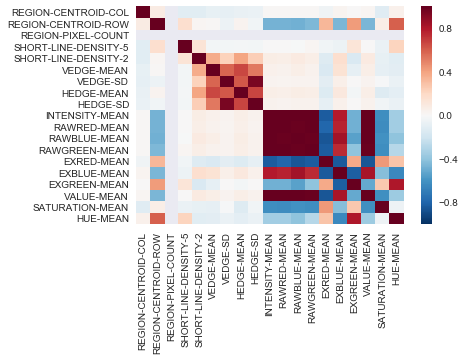

In [7]:
# видно, что признаки сильно кореллированны и с этим необходимо бороться

sns.heatmap(data.corr())

In [9]:
#здесь можно наводить мышкой и смотреть числа и имена признаков
# но, чтоб отображалось, нужно запустить код
#!pip install plotly

import plotly.offline as offline
import plotly.plotly as py
import plotly.graph_objs as go

offline.init_notebook_mode(connected=True)

trace = go.Heatmap(z=data.corr().as_matrix(), x=data.columns, y=data.columns)
offline.iplot([trace])

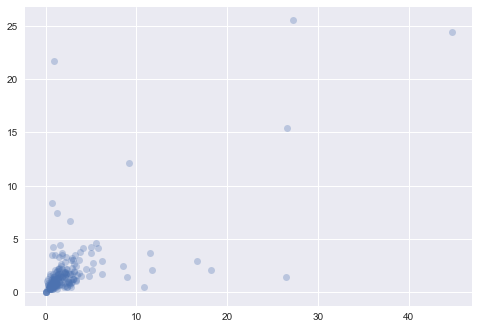

In [46]:
plt.plot(data['HEDGE-MEAN'], data['VEDGE-MEAN'], 'o', alpha = 0.3)

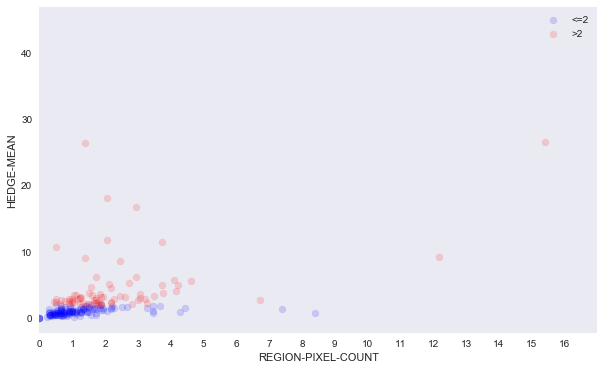

In [19]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['HEDGE-MEAN'] <= 2]['VEDGE-MEAN'],
            data[data['HEDGE-MEAN'] <= 2]['HEDGE-MEAN'],
            alpha = 0.15,
            label = '<=2',
            color = 'b')

plt.scatter(data[data['HEDGE-MEAN'] > 2]['VEDGE-MEAN'],
            data[data['HEDGE-MEAN'] > 2]['HEDGE-MEAN'],
            alpha = 0.15,
            label = '>2',
            color = 'r')

plt.xlabel('REGION-PIXEL-COUNT')
plt.xticks(range(17))
plt.xlim(0, 17)
plt.ylabel('HEDGE-MEAN')
plt.legend(loc='best')
plt.grid()

In [11]:
data.LABEL.unique()

array(['BRICKFACE', 'SKY', 'FOLIAGE', 'CEMENT', 'WINDOW', 'PATH', 'GRASS'], dtype=object)

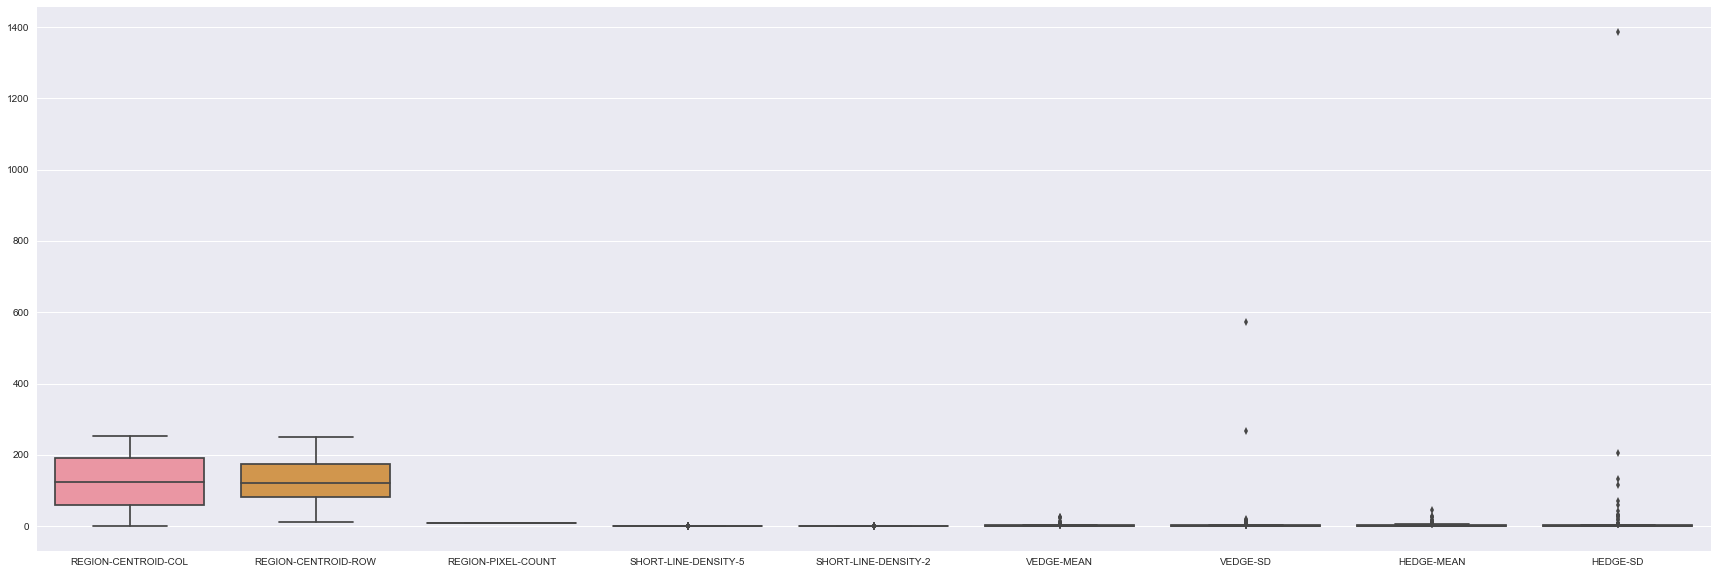

In [21]:
# здесь можно более детально увидеть численные значения признаков и выбросы

fig, ax = plt.subplots(figsize=(30, 10))
sns.boxplot(data.iloc[:, :10])

In [ ]:
# здесь каждый признак представлен такой диаграммой отдельно и сделано деление между классами,
# что бы можно было более наглядно изучить признаки
## для отображения необходимо запустить код

import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np


offline.init_notebook_mode()

for feature in data.columns[1:]:
    trace = []
    print(feature)
    for label in data.LABEL.unique():
        trace.append(
            go.Box(
                #title = feature,
                y = data[feature][data.LABEL == label],
                name = label,
                boxpoints='all',
                jitter=0.5,
                whiskerwidth=0.2,
                marker=dict(
                    size=2,
                ),
                line=dict(width=1)
        ))
    offline.iplot(trace)


In [24]:
data.LABEL.unique()

array(['BRICKFACE', 'SKY', 'FOLIAGE', 'CEMENT', 'WINDOW', 'PATH', 'GRASS'], dtype=object)

## Задача

u'HEDGE-MEAN', u'HEDGE-SD',
       u'INTENSITY-MEAN', u'RAWRED-MEAN', u'RAWBLUE-MEAN', u'RAWGREEN-MEAN',
       u'EXRED-MEAN', u'EXBLUE-MEAN', u'EXGREEN-MEAN' - сильно кореллируют

u'RAWGREEN-MEAN', u'EXRED-MEAN', u'EXBLUE-MEAN', u'EXGREEN-MEAN' - тоже достаточно кореллируют

 u'EXGREEN-MEAN', u'VALUE-MEAN' - достаточно коррелируют

In [25]:
# эти признаки сильно коррелируют, но при их удалении качество классификации ухудшается

#data1 = data.drop(['HEDGE-SD', 'INTENSITY-MEAN', 'RAWRED-MEAN', 'RAWBLUE-MEAN', 'RAWGREEN-MEAN', 'EXRED-MEAN',  'EXBLUE-MEAN','EXGREEN-MEAN', 'VALUE-MEAN'], axis=1)

In [8]:
# REGION-PIXEL-COUNT - константа, число везде равно 9
# остальные признаки не влияют на классификкацию, если смотреть на распределения признаков
# 'VEDGE-SD' при удалении портит качество классификации 

data1 = data.drop(['REGION-PIXEL-COUNT', 'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2', 'HEDGE-SD'], axis=1)

In [ ]:
# для отображения новой матрицы корелляции необходимо запустить код

offline.init_notebook_mode()

trace = go.Heatmap(z=data1.corr().as_matrix(), x=data1.columns, y=data1.columns)
offline.iplot([trace], filename='basic-heatmap')

# Готовим данные

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 16 columns):
LABEL                  210 non-null object
REGION-CENTROID-COL    210 non-null float64
REGION-CENTROID-ROW    210 non-null float64
VEDGE-MEAN             210 non-null float64
VEDGE-SD               210 non-null float64
HEDGE-MEAN             210 non-null float64
INTENSITY-MEAN         210 non-null float64
RAWRED-MEAN            210 non-null float64
RAWBLUE-MEAN           210 non-null float64
RAWGREEN-MEAN          210 non-null float64
EXRED-MEAN             210 non-null float64
EXBLUE-MEAN            210 non-null float64
EXGREEN-MEAN           210 non-null float64
VALUE-MEAN             210 non-null float64
SATURATION-MEAN        210 non-null float64
HUE-MEAN               210 non-null float64
dtypes: float64(15), object(1)
memory usage: 26.3+ KB


В датасете нет категориальных признаков, все числовые.

# Обрабатываем пропущенные значения

In [10]:
# пропущенных значений в данных нет

data1.isnull().sum()/float(data.shape[0])

LABEL                  0.0
REGION-CENTROID-COL    0.0
REGION-CENTROID-ROW    0.0
VEDGE-MEAN             0.0
VEDGE-SD               0.0
HEDGE-MEAN             0.0
INTENSITY-MEAN         0.0
RAWRED-MEAN            0.0
RAWBLUE-MEAN           0.0
RAWGREEN-MEAN          0.0
EXRED-MEAN             0.0
EXBLUE-MEAN            0.0
EXGREEN-MEAN           0.0
VALUE-MEAN             0.0
SATURATION-MEAN        0.0
HUE-MEAN               0.0
dtype: float64

In [11]:
data1['REGION-CENTROID-COL'].describe()

count    210.000000
mean     124.647619
std       74.104024
min        1.000000
25%       60.500000
50%      123.500000
75%      189.750000
max      252.000000
Name: REGION-CENTROID-COL, dtype: float64

# Векторизация

В векторизации нет необходимости, так как в датасете нет категориальных признаков

# Нормализация количественных признаков

In [12]:
y = data1.LABEL
X = data1.copy()
del X['LABEL']
X.describe()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,124.647619,122.757143,1.925132,5.719529,2.604233,37.091005,32.967725,44.011112,34.294180,-12.369841,20.760317,-8.390476,44.888360,0.423230,-1.340397
std,74.104024,58.139686,3.158211,43.495942,4.798268,38.677168,35.540563,43.804447,37.057003,11.559599,18.761842,11.003746,43.235182,0.227333,1.559405
min,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-48.222220,-9.666667,-30.555555,0.000000,0.000000,-2.530950
25%,60.500000,81.500000,0.666667,0.400921,0.777779,6.453704,7.000000,8.277778,3.805555,-18.111110,4.111111,-15.750000,10.527778,0.275722,-2.187112
50%,123.500000,121.500000,1.222222,0.828695,1.388889,21.314816,18.611112,26.833334,20.000000,-10.333333,19.555556,-9.888889,28.388890,0.365455,-2.044163
75%,189.750000,174.500000,1.888890,1.676634,2.597221,52.629629,46.750000,64.194447,46.472223,-4.666666,34.333332,-3.722222,64.194447,0.539738,-1.429800
max,252.000000,250.000000,25.500000,572.996400,44.722225,143.444440,136.888890,150.888890,142.555560,5.777778,78.777780,21.888890,150.888890,1.000000,2.864931


In [13]:
from sklearn.preprocessing import scale

X = X.astype(float)
X = pd.DataFrame(scale(X), columns=X.columns)
X.head(3)

,REGION-CENTROID-COL,REGION-CENTROID-ROW,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,0.207668,0.038669,-0.522856,-0.130359,-0.404770,-0.800981,-0.722995,-0.831680,-0.831478,1.371334,-0.871709,0.045692,-0.860393,0.539724,0.140503
1,0.856954,0.176598,-0.505223,-0.125664,-0.439588,-0.788502,-0.694791,-0.829138,-0.822461,1.506224,-0.931072,0.005205,-0.844937,0.508617,0.267136
2,-0.265769,0.280044,-0.522856,-0.129335,-0.369952,-0.802901,-0.716727,-0.841851,-0.831478,1.448414,-0.931072,0.065936,-0.865545,0.482371,0.240698


#  Построение модели

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

(147, 63)


In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [35]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

(0.12244897959183673, 0.1111111111111111)


In [36]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_predict)

array([[ 9,  0,  0,  0,  0,  0,  0],
       [ 3,  6,  0,  0,  1,  0,  1],
       [ 1,  0,  6,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  0, 10,  0,  0],
       [ 0,  0,  0,  0,  0, 12,  0],
       [ 1,  0,  0,  0,  0,  0,  3]])

# Подбор параметров

In [138]:
from sklearn.model_selection import GridSearchCV
nnb = range(1, 101)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

(0.13605442176870752, 1)


In [139]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

(0.0, 0.063492063492063489)


Случайный лес дал очень высокое качество классификации (всего 0.06 долю ошибки), при том, что классификация происходит на 7 клаассов это очень хороший результат

# График зависимости точности от кол-ва соседей

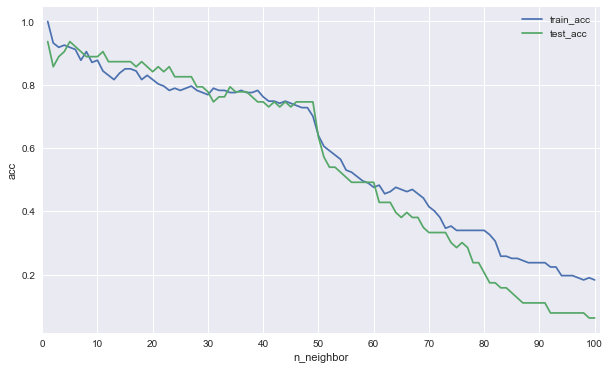

In [37]:
from sklearn.metrics import accuracy_score

tr_err = []
ts_err = []
for n in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    tr_err.append(accuracy_score(y_train, knn.predict(X_train)))
    ts_err.append(accuracy_score(y_test, knn.predict(X_test)))

plt.figure(figsize = (10, 6))
plt.plot(range(1, 101), tr_err, label='train_acc')
plt.plot(range(1, 101), ts_err, label='test_acc')
plt.xlabel('n_neighbor')
plt.xticks(np.linspace(0, 100, 11))
plt.xlim(0, 101)
plt.ylabel('acc')
plt.legend(loc='best')

Здесь можно сделать вывод, что при малых количесвах соседей классификатор работает лучше

# График зависимости точности размера обучающей и тестовой выборок

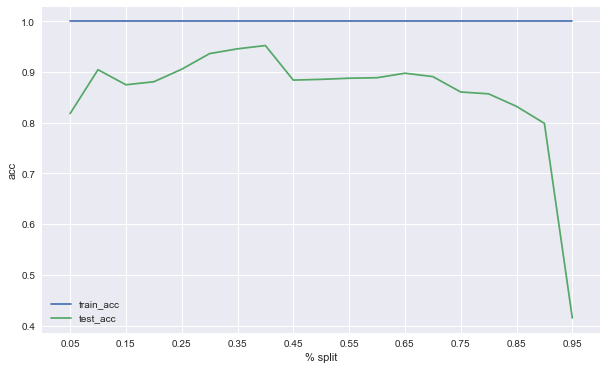

In [39]:
tr_err = []
ts_err = []
for n in np.linspace(0.05, 0.95, 19):    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = n, random_state = 1)
    knn = KNeighborsClassifier(n_neighbors = best_n_neighbors)
    knn.fit(X_train, y_train)
    tr_err.append(accuracy_score(y_train, knn.predict(X_train)))
    ts_err.append(accuracy_score(y_test, knn.predict(X_test)))
    
plt.figure(figsize = (10, 6))
plt.plot(np.linspace(0.05, 0.95, 19), tr_err, label='train_acc')
plt.plot(np.linspace(0.05, 0.95, 19), ts_err, label='test_acc')
plt.xlabel('% split')
plt.xticks(np.linspace(0.05, 0.95, 10))
plt.xlim(0, 1)
plt.ylabel('acc')
plt.legend(loc='best')

А здесь видно оптимальную долю деления на тестовую и обучабщую выборку (около 0,35 к 0,65)

## Neural Network

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 123)
N_test, _ = X_test.shape

### Обучение классификатора

In [99]:
# Воспользуемся нейнонной сетью многслойным персептроном
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 123)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=123,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

### Проверка качесва 

In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)

(1.0, 0.91428571428571426)

## Подбор параметров 

In [101]:
# для подбора параметров воспользуемся поиском по сетке параметров GridSearchCV

from sklearn.model_selection import GridSearchCV

parameters = {'activation' : ('identity', 'logistic', 'tanh', 'relu'),
              'solver' : ('lbfgs', 'sgd', 'adam'),
              'learning_rate' : ('constant', 'invscaling', 'adaptive'),
              'alpha' : np.linspace(0, 1, 10), 
             'learning_rate_init' : np.linspace(0.0001, 1, 10), 
              
             }
clf = MLPClassifier(hidden_layer_sizes=(100,), early_stopping=False, validation_fraction=0.1,
                    max_iter=100, random_state = 123)
clf = GridSearchCV(clf, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=123,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([ 0.     ,  0.11111,  0.22222,  0.33333,  0.44444,  0.55556,
        0.66667,  0.77778,  0.88889,  1.     ]), 'activation': ('identity', 'logistic', 'tanh', 'relu'), 'learning_rate': ('constant', 'invscaling', 'adaptive'), 'learning_rate_init': array([  1.00000e-04,   1.11200e-01,   2.22300e-01,   3.33400e-01,
         4.44500e-01,   5.55600e-01,   6.66700e-01,   7.77800e-01,
         8.88900e-01,   1.00000e+00]), 'solver': ('

In [115]:
# попробуем при найденном значении альфа, качество действительно немного улучшилось
mlp_model = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=43,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)

(0.97142857142857142, 0.95714285714285718)

In [63]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 123)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

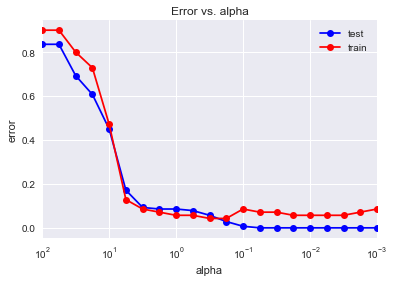

In [64]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

Чем мельне альфа, тем меньше ошибка классификации

In [65]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

(0.0, 0.042857142857142858)


In [66]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[ 0.17782794  0.31622777]


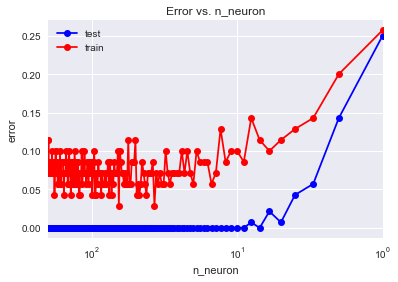

In [94]:
n_neuron_arr = np.linspace(1, 200, 200)
test_err = []
train_err = []
for n in n_neuron_arr:
    mlp_model = MLPClassifier(alpha = 0.001, hidden_layer_sizes = (int(n),), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 123)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
plt.semilogx(n_neuron_arr, train_err, 'b-o', label = 'test')
plt.xlim(200, 0)
plt.title('Error vs. n_neuron')
plt.xlabel('n_neuron')
plt.ylabel('error')
plt.legend()

Чем больше нейронов, тем лучше точность, но при большом количесве нейронов ошибка начинает "скакать", это говорит о непресказуемости выбора кол-ва нейронов из этого промежутка

## Посмотрим качество классификатора с подобранными параметрами 

In [110]:
mlp_model = MLPClassifier(alpha = alpha_opt[0], hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0285714285714
0.0428571428571


In [111]:
print(confusion_matrix(y_test_pred, y_test))

[[ 9  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  1]
 [ 0  0  7  0  0  0  2]
 [ 0  0  0 16  0  0  0]
 [ 0  0  0  0 13  0  0]
 [ 0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  6]]


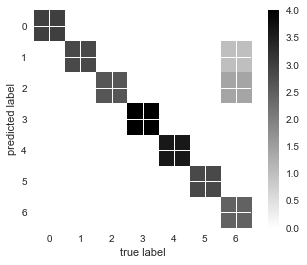

In [72]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(7))
plt.yticks(range(7))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

  BRICKFACE       1.00      1.00      1.00         9
     CEMENT       0.89      1.00      0.94         8
    FOLIAGE       0.78      1.00      0.88         7
      GRASS       1.00      1.00      1.00        16
       PATH       1.00      1.00      1.00        13
        SKY       1.00      1.00      1.00         8
     WINDOW       1.00      0.67      0.80         9

avg / total       0.97      0.96      0.96        70



## Вывод: классификация на 7 классов проходит с очень хорошим уровнем точности (0.96 против 0.14 в случае случайного гадания).  Можно увидеть, что происходят ошибки в классах 'SKY' и 'FOLIAGE', были случаи, когда они были признаны классом 'GRASS', но по факту произошло всего 3 ошибки, что очень хорошо для классификации такогомасштаба. Нейронная сеть справилась с классификацией на 0.02 точности лучше, чем случайный лес.